In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image, ImageOps
from math import log10, sqrt
import math



def PSNR(original_img, target_img):
    R2 = np.amax(original_img)**2
    mse = np.sum(np.power(np.subtract(original_img, target_img), 2))
    if mse == 0:
        return 100
    mse /= (original_img.size[0]*original_img.size)
    psnr = 10*np.log10(R2 / mse)
    return psnr[0]

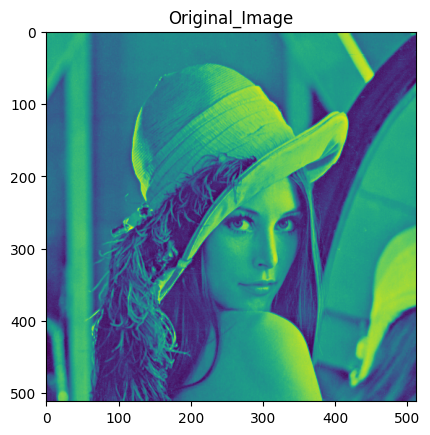

In [94]:
# ORIGINAL IMAGE

plt.title("Original_Image")
lena_colored = mpimg.imread("lena512.bmp")
originalPSNR = PSNR(lena_colored, lena_colored) # Calculating the PSNR value
plt.imshow(lena_colored)

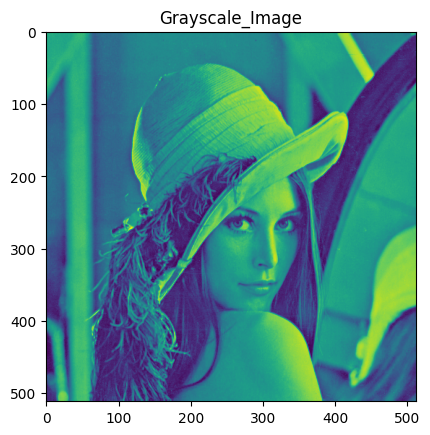

In [95]:
# GRAYSCALE IMAGE

lena_colored = Image.fromarray(lena_colored)
lena_colored = lena_colored.convert()
lena_grayscale = ImageOps.grayscale(lena_colored)
grayscalePSNR = PSNR(lena_colored, lena_grayscale) # Calculating the PSNR value
plt.title("Grayscale_Image")
plt.imshow(lena_grayscale)

Original_Image_Size = (512, 512)
Resized_Image_Size = (256, 256)


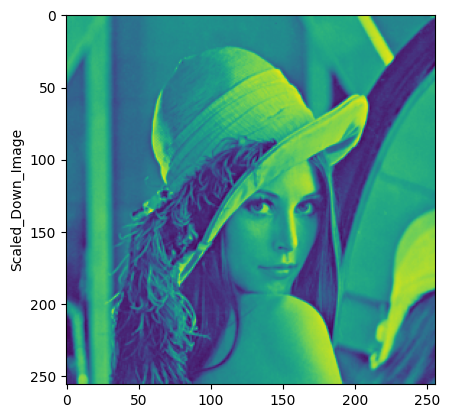

In [89]:
# SCALED DOWN IMAGE

width, height = lena_grayscale.size
lena_resize_half = lena_grayscale.resize((int(width/2), int(height/2)))
print("Original_Image_Size = {}".format(lena_colored.size))
print("Resized_Image_Size = {}".format(lena_resize_half.size))
plt.ylabel("Scaled_Down_Image")
plt.imshow(lena_resize_half)

Text(0.5, 0, 'PSNR = 8.794879083489567')

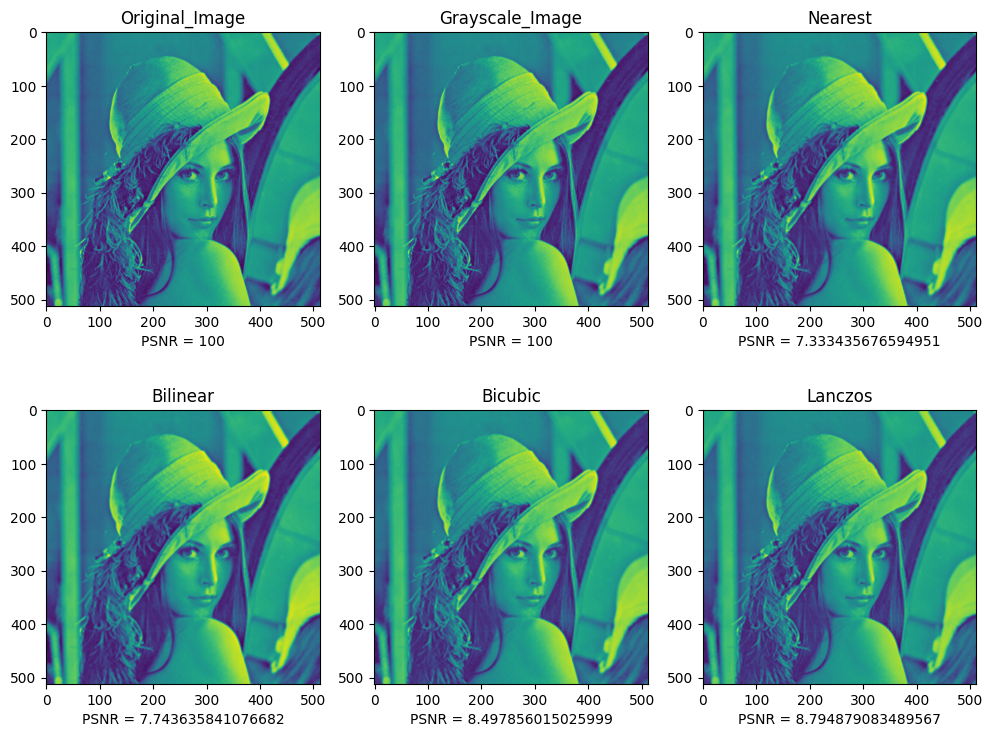

In [93]:
# Now we need to scale up the resized image
#
# 1. Nearest Neigbor

lena_scale_up_nearest = lena_resize_half.resize((width, height), Image.Resampling.NEAREST)
nearestPSNR = PSNR(lena_colored, lena_scale_up_nearest) # Calculating the PSNR value

# 2. Bilinear

lena_scale_up_bilinear = lena_resize_half.resize((width, height), Image.Resampling.BILINEAR)
bilinearPSNR = PSNR(lena_colored, lena_scale_up_bilinear)

# 3. Bicubic

lena_scale_up_bicubic = lena_resize_half.resize((width, height), Image.Resampling.BICUBIC)
bicubicPSNR = PSNR(lena_colored, lena_scale_up_bicubic)

# 4. Lanczos

lena_scale_up_lanczos = lena_resize_half.resize((width, height), Image.Resampling.LANCZOS)
lanczosPSNR = PSNR(lena_colored, lena_scale_up_lanczos)


fig = plt.figure(figsize=(12, 9))

fig.add_subplot(2, 3, 1)
plt.imshow(lena_colored)
plt.title("Original_Image")
plt.xlabel("PSNR = {}".format(originalPSNR))

fig.add_subplot(2, 3, 2)
plt.imshow(lena_grayscale)
plt.title("Grayscale_Image")
plt.xlabel("PSNR = {}".format(grayscalePSNR))

fig.add_subplot(2, 3, 3)
plt.imshow(lena_scale_up_nearest)
plt.title("Nearest")
plt.xlabel("PSNR = {}".format(nearestPSNR))

fig.add_subplot(2, 3, 4)
plt.imshow(lena_scale_up_bilinear)
plt.title("Bilinear")
plt.xlabel("PSNR = {}".format(bilinearPSNR))

fig.add_subplot(2, 3, 5)
plt.imshow(lena_scale_up_bicubic)
plt.title("Bicubic")
plt.xlabel("PSNR = {}".format(bicubicPSNR))

fig.add_subplot(2, 3, 6)
plt.imshow(lena_scale_up_lanczos)
plt.title("Lanczos")
plt.xlabel("PSNR = {}".format(lanczosPSNR))